# Machine learning model for detecting breast cancer

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier

In [ ]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='gist_rainbow_r') 
heatmap.set_title('Correlation Heatmap'); 

## Naive Bayes

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       123
           1       0.97      0.89      0.93        82

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205



C:\Users\kjosep14\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


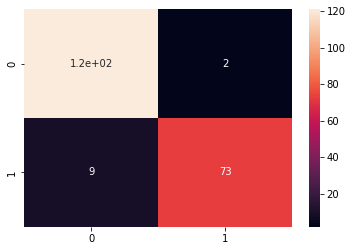

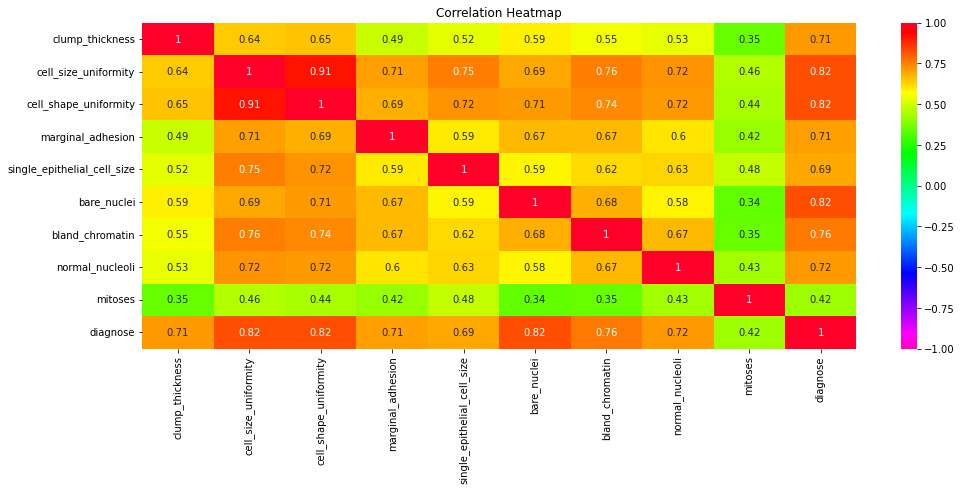

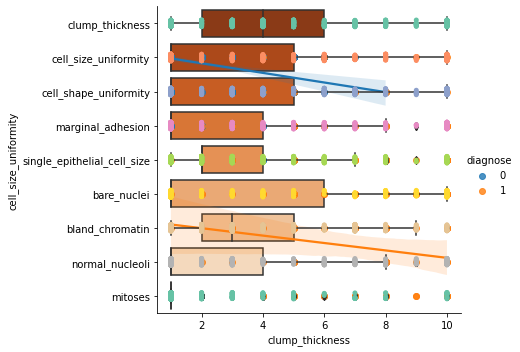

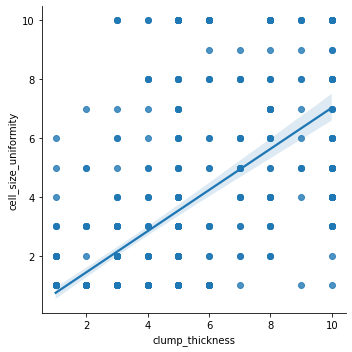

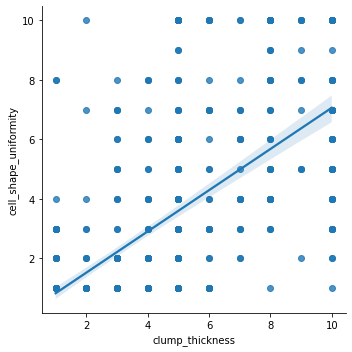

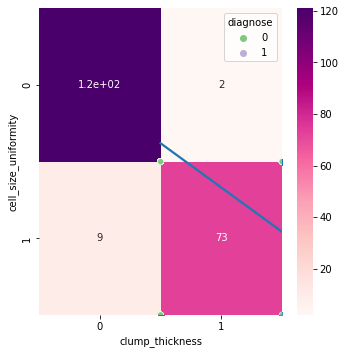

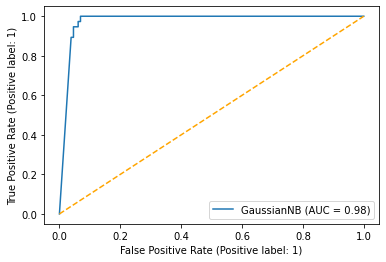

In [8]:
y=df.loc[:,'diagnose']

X=df.drop('diagnose', axis=1) 

Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,y, test_size=0.3, random_state=0)

Xtrain; 

type(Xtrain)

np.shape(Xtrain)

model=GaussianNB() 

model.fit(Xtrain,Ytrain)

Xtest

ypred=model.predict(Xtest) 

ypred

Ytest

model.score(Xtrain,Ytrain)

model.score(Xtest,Ytest) 

cm=confusion_matrix(ypred, Ytest)
cm

print(classification_report(ypred, Ytest))

sns.heatmap(cm, annot=True)

import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 6)) 
 


sns.lmplot(data=df, x='clump_thickness', y='cell_size_uniformity', hue='diagnose')

sns.boxplot(data=X, orient='h', palette='Oranges_r')

sns.stripplot(data=X, orient='h', palette='Set2')

sns.lmplot(data=df, x='clump_thickness', y='cell_size_uniformity',palette='Set3')

sns.lmplot(data=df, x='clump_thickness', y='cell_shape_uniformity')

sns.lmplot(data=df, x='clump_thickness', y='normal_nucleoli')

sns.heatmap(cm, annot=True, cmap='RdPu'); 

import seaborn as sns 
 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='Accent');  

!pip install xgboost

from sklearn.metrics import confusion_matrix,classification_report, plot_roc_curve,roc_curve, auc 

disp=plot_roc_curve(model, Xtest, Ytest) 
plt.plot([0,1], [0,1], color='orange', linestyle='--');



              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.92      0.95      0.93        73

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



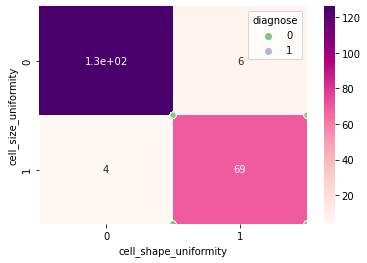

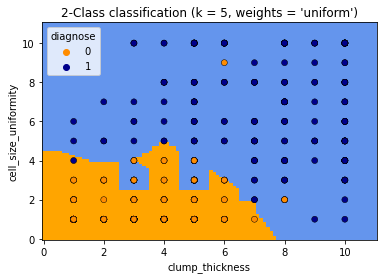

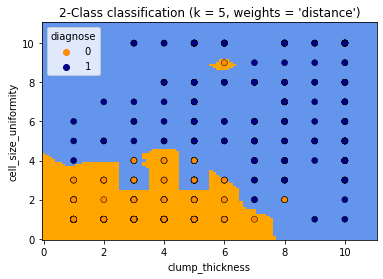

In [10]:
df=pd.read_csv('breast_cancer.csv')

df.head(5)

X=df.drop('diagnose', axis=1)

X1=df.iloc[:,0:4]

X1.head()

xlabel=X1.columns[0]
ylabel=X1.columns[1]

y=df['diagnose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Data standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=KNeighborsClassifier(n_neighbors=5)   # k=5

model.fit(X_train, y_train)

ypred=model.predict(X_test)

ypred

## Accuracy for Training Data

model.score(X_train, y_train)

## Accuracy for Testing Data

model.score(X_test, y_test)

## Confusion Matrix

cm=confusion_matrix(ypred, y_test)

sns.heatmap(cm, annot=True, cmap='RdPu');

## Classification Report

print(classification_report(ypred, y_test))

## Scatter Plot - Cell_shape_uniformity vs Cell_size_uniformity

sns.scatterplot(data=df, x="cell_shape_uniformity", y="cell_size_uniformity", hue="diagnose", palette='Accent');

## Plotting decision boundry when considering two features ( Clump Thickness and Cell size uniformity)

cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

n_neighbors = 5

X=df.iloc[:,0:2]
y=df['diagnose']


cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]


for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    model.fit(X, y)

    _, ax= plt.subplots()
    DecisionBoundaryDisplay.from_estimator(model,X,cmap=cmap_light,ax=ax,response_method="predict",plot_method="pcolormesh",
        xlabel=X.columns[0],
        ylabel=X.columns[1],
        shading="auto")

 # Plot also the training points'

    sns.scatterplot(
        x=X.iloc[:,0],
        y=X.iloc[:,1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
       )
    
    plt.title(
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights));
  

##Random Forest

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.92      0.95      0.93        73

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



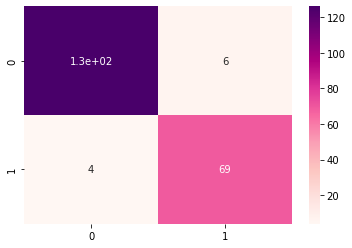

In [5]:
df.describe()

x = df.drop('diagnose',axis = 1)
y = df['diagnose']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state=0)

model = RandomForestClassifier(random_state = 1,n_estimators = 2000)

model.fit(x,y)

I = model.feature_importances_

I



model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

model.score(xtest,ytest)

ypred = model.predict(xtest)

cm = confusion_matrix(ypred,ytest)
cm

sns.heatmap(cm, annot = True,  cmap = 'RdPu')

print(classification_report(ypred,ytest))

##Logistic Regression

Training Accuracy =  97.48953974895397 %
Testing Accuracy =  95.60975609756098 %
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       131
           1       0.93      0.95      0.94        74

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



<function matplotlib.pyplot.show(close=None, block=None)>

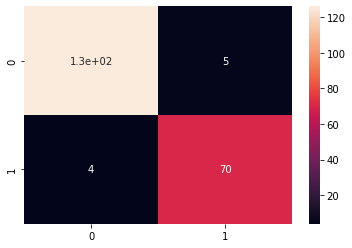

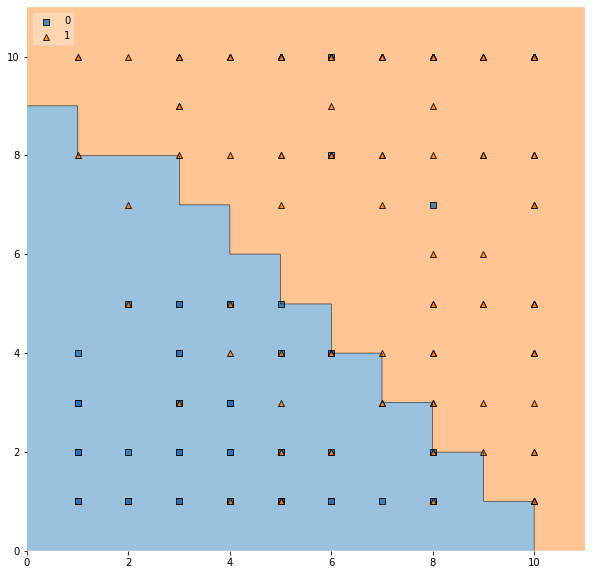

In [6]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions 
from sklearn.decomposition import PCA

# Loading dataset
df = pd.read_csv(r'breast_cancer.csv')

df.describe()

# Previewing data real quick
df.head(10)

# Defining x variables and y variable
x = df.iloc[:,0:9].values
y = df.iloc[:,9].values

# Splitting data for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Initializing the model
lrmodel = LogisticRegression(solver='newton-cg')

# Fitting our training data on the model
lrmodel.fit(xtrain, ytrain)

# Checking intercept of our regression model
lrmodel.intercept_

# Checking the coefficients of our regression model
lrmodel.coef_

# Predicting our testing data
lrprediction = lrmodel.predict(xtest)

# Checking accuracy of our model by comparing it with training data
trscore = lrmodel.score(xtrain, ytrain)

# Checking accuracy of our model by comparing it with testing data
lrscore = lrmodel.score(xtest, ytest)

# Our model has an accuracy of 95.6 %
print('Training Accuracy = ', trscore * 100, '%')
print('Testing Accuracy = ', lrscore * 100, '%')

confusionmatrix = confusion_matrix(lrprediction, ytest)

sns.heatmap(confusionmatrix, annot = True)

print(classification_report(lrprediction, ytest))

df

# Creating Decision Boundaries between features with high coefficient (clump thickness & bare nuclei)

dbx = df.iloc[:,[0,5]].values 
dby = df['diagnose'].values

dbxtrain, dbxtest, dbytrain, dbytest = train_test_split(dbx, dby, test_size=0.3, random_state=0)

lr = LogisticRegression(solver='newton-cg',random_state=0)

lr.fit(dbxtrain, dbytrain);

fig8, ax = plt.subplots(figsize=(10, 10))
fig8 = plot_decision_regions(dbxtrain, dbytrain, clf=lr, legend=2); 

plt.show